In [1]:
# In this exercise, we want to explore supervised learning the way we did in class, and build models
# we can run on a micro-controller like the ESP 32. To run this exercise, you will need Python 3.x and
# Jupyter notebook. One way is to use Jupyter online (see at https://jupyter.org), another one is to 
# install Jupyter notebook on your computer, a third way is to install the Anaconda navigator on your computer.
# This third way is of course better suited for those who will want to work further with ML
# (see at https://anaconda.org/anaconda/anaconda-navigator). Choose a way and proceed with Jupyter.
# Note: in Jupyter, 'enter' gets you another line in the same block. "Shift enter" executes the current block.

In [2]:
#First, let's import some libraries we will need for our computation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#Next, let's import our training set. In your case, the path will be different, modify to match your path to unconv_MV_v5.csv
df = pd.read_csv('/Users/jerhenry/Documents/Perso/IMT/IMT_ML_IoT/unconv_MV_v5.csv');

Text(0, 0.5, 'Pressure (Prod)')

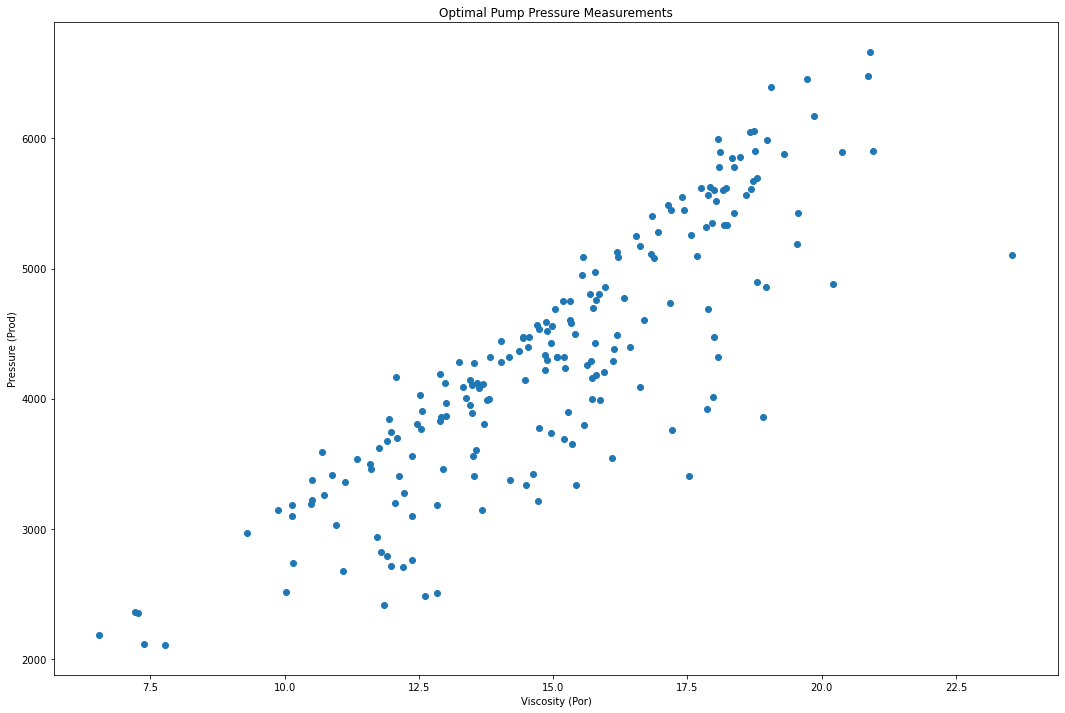

In [4]:
# A good first step is to look at your data, we plot an 18 by 12 figure
plt.figure(figsize=(18,12))
# we plot with the x axis taken from the viscosity, Por, and the y axis taken from the pressure, Prod
plt.plot(df[['Por']], df[['Prod']], 'o')
# And we add caption and legend
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")

In [5]:
#Another good step is to look at your data, the 'df' we created above, head gives us the first 5 lines, but you can 
# put another number, for example df.head(10) would show the first 10 entries
df.head()

,Vessel,Por,Perm,AI,Brittle,TOC,VR,Prod,Reuse
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,1
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,1
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,1
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,0
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,0


In [6]:
# Moving into gradient descent. We first create a shorthand notation, x for the viscosity, y for the pressure column 
x = np.array(df[['Por']])
y = np.array(df[['Prod']])
# we also extract the lentgh of these columns, so we can run the loop on all 'n' entries in the columns
n = len(df[['Por']])
# We pick up two initial values for theta0 and theta1. You could use random values, but it is common to start with 0s
th0_curr = th1_curr = 0
# We also need to decide how many times wil will run the loop. It is common to start with something like 1000, then refine later
iterations = 1000
#then, we need to decide by how much we change theta0 and theta1, for now let's use a fixed number, something small
learning_rate = 0.002

In [7]:
# then we run our loop, for the number of iterations we decided above
for i in range(iterations):
    #at each step,  we take the x value, and use our theta0 and theta1 to predict some y value (likely wrong at the beginning)
    y_predicted = th1_curr * x + th0_curr
    #as we need to modify a bit theta0 and theta1 at each step, we calculate (at each step), the derivative of each theta
    dth1 = -(2/n)*sum(x*(y - y_predicted))
    dth0 = -(2/n)*sum(y - y_predicted)
    #then our next theta is going to be changed by the value of the derivative times the learning rate. Think about what happens here:
    # if the derivative is positive (we are going down toward 0, which is our goal, as we reach a minimum when the derivative is 0)
    # then the next value of theta will be a bit smaller than the previous one. If the derivative is negative (we are too low),
    # then the next value of theta will be a bit larger than the previous one (going back up toward 0).
    # At the same time, as the derivative gets closer to 0, we change theta by a smaller and smaller value, to avoid missing the minimum
    th1_curr = th1_curr - learning_rate * dth1
    th0_curr = th0_curr - learning_rate * dth0
    # one good way to see what is going on is to print at each iteration the thetas and the cost
    # if everything works well, then the cost should be going down. So we don't need the cost for the loop itself,
    # but we want to compute it here, just so we can print it and see if it is going down:
    cost = (1/n) * sum ([val**2 for val in (y - y_predicted)])
    print("th1 {}, th0 {}, cost {}, iteration {}".format(th1_curr,th0_curr,cost,i))
    # if the cost is going down too slow, use a larger learning rate. If the cost is not going down, your learning rate is too large
    # Here, try with a learning rate of 0.1 (bounces around the minumum, too large), and 0.0001 (too slow)

th1 [268.63175055], th0 [17.24487941], cost [19565836.12712795], iteration 0
th1 [285.30766932], th0 [18.31238383], cost [326212.75074016], iteration 1
th1 [286.34304491], th0 [18.37565344], cost [252072.94765806], iteration 2
th1 [286.40750985], th0 [18.37658408], cost [251787.24516904], iteration 3
th1 [286.41170401], th0 [18.37364539], cost [251786.13910998], iteration 4
th1 [286.41215673], th0 [18.37046695], cost [251786.12974345], iteration 5
th1 [286.41237717], th0 [18.36727408], cost [251786.12460456], iteration 6
th1 [286.41258316], th0 [18.36408076], cost [251786.11948348], iteration 7
th1 [286.41278823], th0 [18.36088786], cost [251786.114364], iteration 8
th1 [286.41299321], th0 [18.35769543], cost [251786.10924606], iteration 9
th1 [286.41319815], th0 [18.35450349], cost [251786.10412965], iteration 10
th1 [286.41340307], th0 [18.35131202], cost [251786.09901477], iteration 11
th1 [286.41360795], th0 [18.34812103], cost [251786.09390143], iteration 12
th1 [286.41381281], th

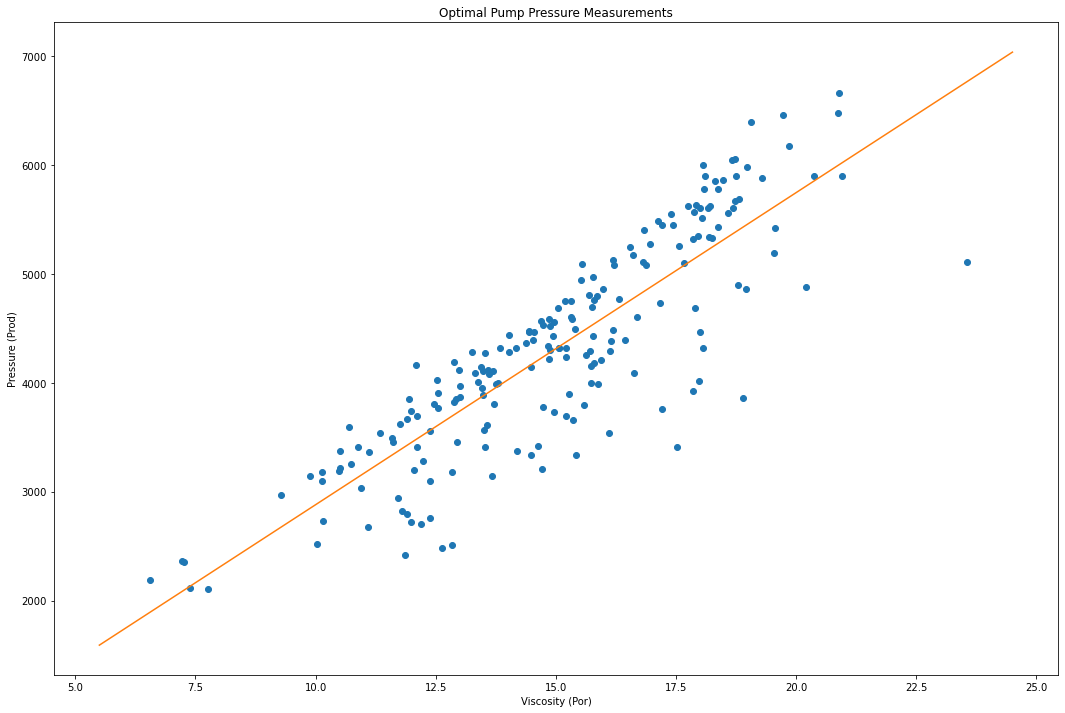

In [8]:
# Let's plot our data again, and overlay there the line we found
# As our x values range from 5 to 25, we just compute two points on the line, one at x=5.5 and the other at x=24.5 (we compute the predicted
# y for each, now that we have our thetas). The below code is ugly, but the goal is to show you what happens, even if you do not master python:
A1 = 5.5
B1 = int(th1_curr * A1 + th0_curr)
A2 = 24.5 
B2 = int(th1_curr * A2 + th0_curr)
P1 = [A1, A2]
P2 = [B1, B2]
# the same figure as before:
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['Prod']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")
# adding our line:
plt.plot(P1, P2)

In [9]:
# Now let's automate all this instead, by using scikit learn libraries, in particular the linear model:
from sklearn import linear_model
# let's create a linear regression object
reg = linear_model.LinearRegression()

In [10]:
# then all the training we did above is summarized in a single command, taking as parameters the x and y columns we train against:
reg.fit(df[['Por']],df[['Prod']])

LinearRegression()

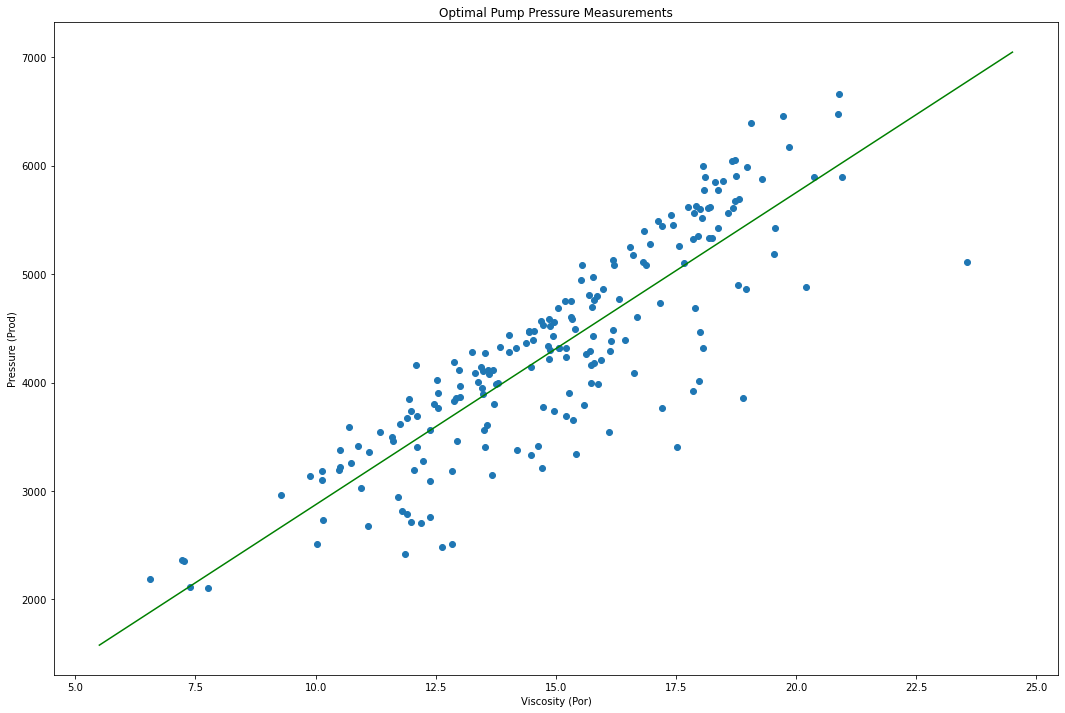

In [11]:
# All done. Let's plot the whole thing again:
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['Prod']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")
# adding our predicted line, this time in green (again, there is  a better way, using this heavy handed for clarity):
A3 = 5.5
B3 = int(reg.predict([[A3]]))
A4 = 24.5 
B4 = int(reg.predict([[A4]]))
P3 = [A3, A4]
P4 = [B3, B4]
plt.plot(P3, P4, color = 'green')


In [12]:
# If you want to see the thetas, theta0 is called the intercept, and theta1 is called the coefficient:
int(reg.intercept_), int(reg.coef_)
# 1. What coefficient did you find?

(-2, 287)

In [13]:
# Last, if you want to run a prediction, you can use the same 'predict' command, for example suppose a new Por value:
New_Por = 8
#let's predict the presure for that Por:
reg.predict([[New_Por]])
# 2. What predicted value do you find?

array([[2299.30151175]])